# Распределение Гаусса #

## Список обозначений ##

$(\Omega, \mathcal{F}, \mathbb{P})$ &mdash; вероятностное пространство ($\Omega$ &mdash; множество исходов, $\mathcal{F}$ &mdash; $\sigma$-алгебра, $\mathbb{P}$ &mdash; вероятностная мера)

$\mathbb{E}X$, $\mathbb{E}(X)$ &mdash; математическое ожидание случайной величины $X$

$\mathbb{D}X$, $\mathbb{D}(X)$ &mdash; дисперсия случайной величины $X$

In [1]:
# Imports
import sys
import numpy as np
import scipy.stats as stats
np.random.seed(42)

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm # Colormaps
from matplotlib.patches import Ellipse
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

In [2]:
# Styles, fonts
sns.set_style('whitegrid')
matplotlib.rcParams['font.size'] = 12

---

## Гауссовские случайные величины ##

### Определение ###
(*Ширяев, глава 2, параграф 8. Случайные величины. II*)

Если $\xi$ &mdash; случайная величина с гауссовской (нормальной) плотностью (probability density function, pdf)

$$ p(x \mid \mu, \sigma) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp{ \left( -\frac{(x - \mu)^2}{2\sigma^2}\right)}, \quad \sigma>0, \quad -\infty < \mu < \infty, $$

то смысл параметров $\mu$ и $\sigma$ оказывается очень простым:
$$ \mu = \mathbb{E} \xi, \quad \sigma^2 = \mathbb{D} \xi . $$

Таким  образом, рапределение вероятностей этой случайной величины $\xi$, называемой *гауссовской* или *нормально распределённой*, полностью определяется её средним значением $\mu$ и дисперсией $\sigma^2$. В этой связи часто используется запись
$$ \xi \sim \mathcal{N}\left( \mu, \sigma^2 \right). $$

In [3]:
def univariate_normal(x, mean, variance):
    """pdf of the univariate normal distribution"""
    return ((1. / np.sqrt(2 * np.pi * variance)) * 
            np.exp(-(x - mean)**2 / (2 * variance)))

### Свойства ###

1. Если $\xi$ и $\eta$ — гауссовские случайные величины, то из их *некоррелированности* следует их *независимость*.

2. Сумма двух независимых гауссовских случайных величин снова есть гауссовская случайная величина со средним $\mu_1 + \mu_2$ и дисперсией $\sigma_1^2 + \sigma_2^2$.

3. **Центральная предельная теорема:** распределение суммы большого числа независимых случайных величин или случайных векторов, подчиняющихся не слишком стеснительным условиям, хорошо аппроксимируется нормальным распределением.

### Примеры ###

Ниже приведены примеры трёх одномерных нормальных распределений:
1. $\mathcal{N}(0, 1)$,
2. $\mathcal{N}(2, 3)$,
3. $\mathcal{N}(0, 0.2)$.

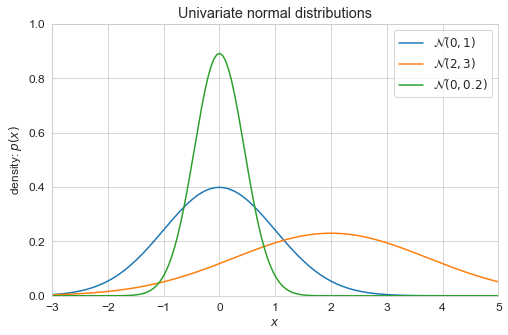

In [4]:
# Plot different Univariate Normals
x = np.linspace(-3, 5, num=150)
fig = plt.figure(figsize=(8, 5))
plt.plot(
    x, univariate_normal(x, mean=0, variance=1), 
    label="$\mathcal{N}(0, 1)$")
plt.plot(
    x, univariate_normal(x, mean=2, variance=3), 
    label="$\mathcal{N}(2, 3)$")
plt.plot(
    x, univariate_normal(x, mean=0, variance=0.2), 
    label="$\mathcal{N}(0, 0.2)$")
plt.xlabel('$x$')
plt.ylabel('density: $p(x)$')
plt.title('Univariate normal distributions')
plt.ylim([0, 1])
plt.xlim([-3, 5])
plt.legend(loc=1)
# fig.subplots_adjust(bottom=0.15)
plt.show()

---

## Многомерное нормальное распределение ##

### Определение ###

Многомерное нормальное распределение представляет собой многомерное обобщение одномерного нормального распределения. Оно представляет собой распределение многомерной случайной величины, состоящей из нескольких случайных величин, которые могут быть скоррелированы друг с другом.

Как и одномерное, многомерное нормальное распределение определяется набором параметров: вектором средних значений $\mathbf{\mu}$, который является вектором математических ожиданий распределения, и ковариоционной матрицей $\Sigma$, которая измеряет степень зависимости двух случайных величин и их совместного изменения. Обозначим ковариацию между переменными $X$ и $Y$ как $C(X,Y)$. 

Многомерное нормальное распределение с размерностью $d$ имеет функцию плотности совместной вероятности, указанную ниже:

$$
p(\mathbf{x} \mid \mathbf{\mu}, \Sigma) = \frac{1}{\sqrt{(2\pi)^d \lvert\Sigma\rvert}} \exp{ \left( -\frac{1}{2}(\mathbf{x} - \mathbf{\mu})^T \Sigma^{-1} (\mathbf{x} - \mathbf{\mu}) \right)}.
$$

Здесь $\mathbf{x}$ &mdash; случайный вектор размерностью $d$, $\mathbf{\mu}$ &mdash; средний математического ожидания, $\Sigma$ &mdash; ковариационная матрица (симметричная, положительная определенная матрица с размерностью $d \times d$), а $\lvert\Sigma\rvert$ &mdash; её определитель. Многомерное нормальное распределение принято обозначать следующим образом: 

$$
\xi \sim \mathcal{N}(\mathbf{\mu}, \Sigma)
$$

In [5]:
def multivariate_normal(x, d, mean, covariance):
    """pdf of the multivariate normal distribution."""
    x_m = x - mean
    return (1. / (np.sqrt((2 * np.pi)**d * np.linalg.det(covariance))) * 
            np.exp(-0.5*(np.linalg.solve(covariance, x_m).T.dot(x_m))))

### Ковариационная матрица ###

Пусть $\xi = \left( \xi_1, \dots, \xi_n \right)$ — случайный вектор, компоненты которого имеют конечный второй момент. Назовём *матрицей ковариаций* (ковариационной матрицей) вектора $\xi$ матрицу (порядка $n \times n$) $\mathrm{R} = ||R_{ij}||$, где $R_{ij} = \text{cov}\left( \xi_i, \xi_j \right)$.

Матрица $\mathrm{R}$ является *симметричной* и *положительно определённой*. Следующая лемма показывает, что справедлив и обратный результат.

**Лемма.** Для того, чтобы матрица $\mathrm{R}$ порядка $n \times n$ была ковариационной матрицей некоторого вектора $\xi = \left( \xi_1, \dots, \xi_n \right)$, необходимо и достаточно, чтобы эта матрица была симметрической и неотрицательно определённой или, что эквивалентно, существовала бы матрица $L$ (порядка $n \times k$, $1 \le k \le n$) такая, что $ \mathbb{R} = LL^\top $.

$$
\mathbb{E} \xi \xi^\top = \mathbb{E}(L\eta)(L\eta)^\top = L \cdot \mathbb{E}\eta\eta^\top \cdot L^\top = L I_d L^\top = LL^\top
$$

**Замечание.** Представление симметричной положительно определённой матрицы в виде произведения *нижнетреугольной* матрицы $L$ и *верхнетреугольной* матрицы $L^\top$ называется *разложением Холецкого*.

**Задание.** Напишите функцию, осуществляющую разложение Холецкого.

### Примеры ###

Примеры двумерных нормальных распределений приведены ниже.

1. Двумерное распределение с ковариацией между $x_1$ и $x_2$ равной $0$ (независимые переменные):

$$
\mathcal{N}\left(
\begin{bmatrix}
    0 \\
    0
\end{bmatrix}, 
\begin{bmatrix}
    1 & 0 \\
    0 & 1 
\end{bmatrix}\right)
$$

2. Двумерное распределение параметров $x_1$ и $x_2$ с отличной от $0$ ковариацией (скоррелированые переменные). Увеличение $x_1$ увеличивает вероятность того, что $x_2$ также увеличится:

$$
\mathcal{N}\left(
\begin{bmatrix}
    0 \\
    1
\end{bmatrix}, 
\begin{bmatrix}
    1 & 0.8 \\
    0.8 & 1
\end{bmatrix}\right)
$$

In [6]:
# Plot bivariate distribution
def generate_surface(mean, covariance, d):
    """Helper function to generate density surface."""
    nb_of_x = 100 # grid size
    x1s = np.linspace(-5, 5, num=nb_of_x)
    x2s = np.linspace(-5, 5, num=nb_of_x)
    x1, x2 = np.meshgrid(x1s, x2s) # Generate grid
    pdf = np.zeros((nb_of_x, nb_of_x))
    # Fill the cost matrix for each combination of weights
    for i in range(nb_of_x):
        for j in range(nb_of_x):
            pdf[i,j] = multivariate_normal(
                np.matrix([[x1[i,j]], [x2[i,j]]]), 
                d, mean, covariance)
    return x1, x2, pdf  # x1, x2, pdf(x1,x2)

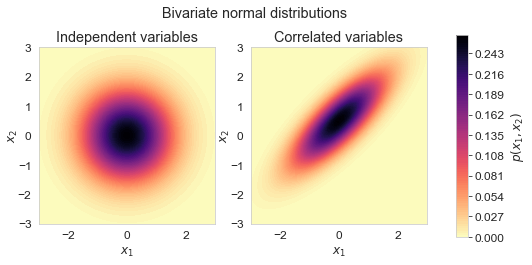

In [7]:
# subplot
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
d = 2  # number of dimensions
cmap = cm.magma_r

# Generate independent Normals
bivariate_mean = np.matrix([[0.], [0.]])  # Mean
bivariate_covariance = np.matrix([
    [1., 0.], 
    [0., 1.]])  # Covariance
x1, x2, p = generate_surface(
    bivariate_mean, bivariate_covariance, d)

# Plot bivariate distribution 1
con = ax1.contourf(x1, x2, p, 100, cmap=cmap)
# Plot 95% Interval
# e = make_ellipse(bivariate_mean, bivariate_covariance)
# ax1.add_artist(e)
ax1.set_xlabel('$x_1$')
ax1.set_ylabel('$x_2$', va='center')
ax1.axis([-3., 3., -3., 3.])
ax1.set_aspect('equal')
ax1.set_title('Independent variables')


# Generate correlated Normals
bivariate_mean = np.matrix([[0.], [0.5]])  # Mean
bivariate_covariance = np.matrix([
    [1., 0.8], 
    [0.8, 1.]])  # Covariance
x1, x2, p = generate_surface(
    bivariate_mean, bivariate_covariance, d)

# Plot bivariate distribution 2
con = ax2.contourf(x1, x2, p, 100, cmap=cmap)
# Plot 95% Interval
# e = make_ellipse(bivariate_mean, bivariate_covariance)
# ax2.add_artist(e)
ax2.set_xlabel('$x_1$')
ax2.set_ylabel('$x_2$', va='center')
ax2.axis([-3., 3., -3., 3.])
ax2.set_aspect('equal')
ax2.set_title('Correlated variables')

# Add colorbar and title
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
cbar = fig.colorbar(con, cax=cbar_ax)
cbar.ax.set_ylabel('$p(x_1, x_2)$')
plt.suptitle('Bivariate normal distributions', y=0.95)
plt.show()

### Аффинные преобразования многомерного нормального распределения ###
 
Многомерное нормальное распределение можно преобразовать с помощью аффинного преобразования. Так, если $X$ нормально распределен и $Y = u + LX$ с линейным преобразованием $L$ и вектором $u$, то $Y$ также нормально распределен со средним значением $\mu_{Y} = u + L\mu_{X}$ и ковариационной матрицей $\Sigma_{Y} = L\Sigma_{X}L^\top$.

$$X \sim \mathcal{N}(\mu_{X}, \Sigma_{X}) \quad\quad Y \sim \mathcal{N}(\mu_{Y}, \Sigma_{Y}) \\
\mathcal{N}(\mu_{Y}, \Sigma_{Y}) = \mathcal{N}(u + L\mu_{X}, L\Sigma_{X}L^\top) = u + L\mathcal{N}(\mu_{X}, \Sigma_{X})$$

Это можно доказать следующим образом:

$$\mu_{Y} = \mathbb{E}[Y] = \mathbb{E}[u + LX] = u + \mathbb{E}[LX] = u + L\mu_{X}$$

$$\begin{split}
\Sigma_{Y} & = \mathbb{E}[(Y-\mu_{Y})(Y-\mu_{Y})^\top] \\
           & = \mathbb{E}[(u+LX - u-L\mu_{X})(u+LX - u-L\mu_{X})^\top] \\
           & = \mathbb{E}[(L(X-\mu_{X})) (L(X-\mu_{X}))^\top] \\
           & = \mathbb{E}[L(X-\mu_{X}) (X-\mu_{X})^\top L^\top] \\
           & = L\mathbb{E}[(X-\mu_{X})(X-\mu_{X})^\top]L^\top \\
           & = L\Sigma_{X}L^\top
\end{split}$$

### Генерация гауссовских векторов ###

Предыдущая формула поможет нам сгенерировать гауссовский вектор с заданным вектором средних знгачений и ковариационной матрицей. Для этого можно взять вектор $X$, подчиняющийся стандартному нормальному распределению $X \sim \mathcal{N}(0, I_d)$ со средним значением $\mu_{X} = 0$ и единичной ковариационной матрицей $\Sigma_{X} = I_d$. Генерация такого вектора не представляет труда, так как каждая переменная в $X$ независима от всех других переменных, и мы можем просто генерировать каждую переменную отдельно, пользуясь одномерным распределением Гаусса.

Для генерации $Y \sim \mathcal{N}(\mu_{Y}, \Sigma_{Y})$ возьмём $X$ и применим к нему аффинное преобразование $Y = u + LX$. Из предыдущего раздела мы знаем, что ковариация $Y$ будет $\Sigma_{Y} = L\Sigma_{X}L^\top$. Поскольку $\Sigma_{X}=I_d$ мы можем написать, что

$$
\Sigma_{Y} = L I_d L^\top = L L^\top,
$$

где матрица $L$ &mdash; нижнетреугольная матрица, которую можно найти с  помощью разложения Холецкого матрицы $\Sigma_{X}$, а $u = \mu_{Y} - L\mu_{X} = \mu_{Y}$.

Сгенерируем 100 векторов для следующего распределения:

$$
Y
\sim
\mathcal{N}\left(
\begin{bmatrix}
    0 \\ 
    1 
\end{bmatrix},
\begin{bmatrix}
    1 & 0.8 \\
    0.8 & 1
\end{bmatrix}\right).
$$

In [8]:
def make_ellipse(mu, cov, ci=0.95, color='gray', label='95% ci'):
    """Make covariance isoline"""
    e, v = np.linalg.eig(cov)
    angle = 180/np.pi * np.arccos(v[0, 0])
    q = stats.chi2(2).ppf(ci)
    e = Ellipse(mu, 2*np.sqrt(q*e[0]), 2*np.sqrt(q*e[1]), angle=angle,
                fill=False, color=color, label=label)
    return e

In [9]:
# Sample from:
d = 2 # Number of dimensions
mean = np.matrix([[0.], [1.]])
covariance = np.matrix([
    [1, 0.8], 
    [0.8, 1]
])

# Create L
L = np.linalg.cholesky(covariance)

# Sample X from standard normal
n = 100  # Samples to draw
X = np.random.normal(size=(d, n))
# Apply the transformation
Y = (mean + L.dot(X)).T

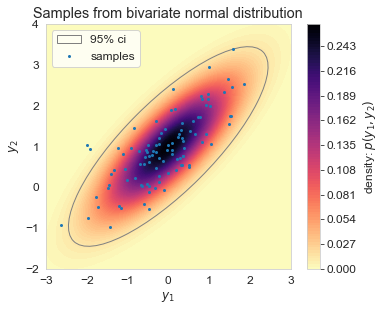

In [10]:
# Plot the samples and the distribution
fig, ax = plt.subplots(figsize=(6, 4.5))
# Plot bivariate distribution
x1, x2, p = generate_surface(mean, covariance, d)
con = ax.contourf(x1, x2, p, 100, cmap=cm.magma_r)
# Plot 95% Interval
e = make_ellipse(mean, covariance)
ax.add_artist(e)
# Plot samples
s = ax.plot(Y[:,0], Y[:,1], 'o', c=cm.tab10(0), ms=2, label='samples')
ax.set_xlabel('$y_1$')
ax.set_ylabel('$y_2$')
ax.axis([-3., 3., -2., 4.])
ax.set_aspect('equal')
ax.set_title('Samples from bivariate normal distribution')
cbar = plt.colorbar(con)
cbar.ax.set_ylabel('density: $p(y_1, y_2)$')

plt.legend(handles=[e, s[0]], loc=2)
plt.show()

---

## Частное и условное нормальные распределения ##

Пусть случайные векторы $\mathbf{x}$ и $\mathbf{y}$ имеют совместное нормальное распределение, определяемыми следующим образом:

$$
\begin{bmatrix}
    \mathbf{x} \\
    \mathbf{y} 
\end{bmatrix}
\sim
\mathcal{N}\left(
\begin{bmatrix}
    \mu_{\mathbf{x}} \\
    \mu_{\mathbf{y}}
\end{bmatrix},
\begin{bmatrix}
    A & C \\
    C^T & B
\end{bmatrix}
\right)
= \mathcal{N}(\mu, \Sigma).
$$

In [11]:
d = 2  # dimensions
mean = np.matrix([[0.], [1.]])
cov = np.matrix([
    [1, 0.8], 
    [0.8, 1]
])

# Get the mean values from the vector
mean_x = mean[0,0]
mean_y = mean[1,0]
# Get the blocks (single values in this case) from 
#  the covariance matrix
A = cov[0, 0]
B = cov[1, 1]
C = cov[0, 1]  # = C transpose in this case

### Частное (маргинальное) распределение ###

**Историческая справка.** *Название &laquo;частное распределение&raquo; используется в переводах под редакцией Колмогорова, &laquo;маргинальное распределение&raquo; &mdash; в более современной литературе путём заимствования из английского языка (англ. marginal distribution); название в английском языке в свою очередь является переводом с немецкого (нем. Randverteilungen) из публикации Колмогорова: A. Kolmogoroff &laquo;Grundbegriffe der Wahrscheinlichkeitsrechnung&raquo;, Springer-Verlag, 1933.*

Частное распределение &mdash; это вероятностное распределение подмножества случайных величин, рассматриваемых в качестве компоненты или множества компонент некоторого известного многомерного распределения. Оно представляет собой распределение вероятностей переменных в подмножестве вне зависимости от значений других переменных в исходном распределении.

В случае двумерного нормального распределения частными распределениями являются одномерные распределения каждой компоненты $\mathbf{x}$ и $\mathbf{y}$ по отдельности. Они определяются так:

$$
\begin{split}
    p(\mathbf{x}) & = \mathcal{N}(\mu_{\mathbf{x}}, A) \\
    p(\mathbf{y}) & = \mathcal{N}(\mu_{\mathbf{y}}, B)
\end{split}
$$

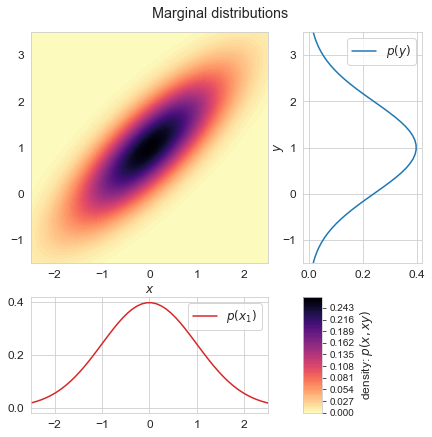

In [12]:
# Plot the conditional distributions
fig = plt.figure(figsize=(7, 7))
gs = gridspec.GridSpec(2, 2, width_ratios=[2, 1], height_ratios=[2, 1])
# gs.update(wspace=0., hspace=0.)
plt.suptitle('Marginal distributions', y=0.93)

# Plot surface on top left
ax1 = plt.subplot(gs[0])
x, y, p = generate_surface(mean, cov, d)
# Plot bivariate distribution
con = ax1.contourf(x, y, p, 100, cmap=cm.magma_r)
ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')
ax1.yaxis.set_label_position('right')
ax1.axis([-2.5, 2.5, -1.5, 3.5])

# Plot y
ax2 = plt.subplot(gs[1])
y = np.linspace(-5, 5, num=100)
py = univariate_normal(y, mean_y, B)
# Plot univariate distribution
ax2.plot(py, y, '-', c=cm.tab10(0), label=f'$p(y)$')
ax2.legend(loc=0)
# ax2.set_xlabel('density')
ax2.set_ylim(-1.5, 3.5)

# Plot x
ax3 = plt.subplot(gs[2])
x = np.linspace(-5, 5, num=100)
px = univariate_normal(x, mean_x, A)
# Plot univariate distribution
ax3.plot(x, px, '-', c=cm.tab10(3), label=f'$p(x_1)$')
ax3.legend(loc=0)
# ax3.set_ylabel('density')
ax3.yaxis.set_label_position('right')
ax3.set_xlim(-2.5, 2.5)

# Clear axis 4 and plot colarbar in its place
ax4 = plt.subplot(gs[3])
ax4.set_visible(False)
divider = make_axes_locatable(ax4)
cax = divider.append_axes('left', size='20%', pad=0.05)
cbar = fig.colorbar(con, cax=cax)
cbar.ax.set_ylabel('density: $p(x, xy)$')
cbar.ax.tick_params(labelsize=10)
plt.show()

### Условное распределение ###

Условное распределение $\mathbf{x}$ при заданном $\mathbf{y}$ определяется следующим образом:

$$ p(\mathbf{x} \mid \mathbf{y}) = \mathcal{N}(\mu_{x|y}, \Sigma_{x|y}) $$

Здесь:
$$
\begin{split}
    \mu_{x|y} & = \mu_x + CB^{-1}(\mathbf{y}-\mu_y) \\
    \Sigma_{x|y} & = A - CB^{-1}C^\top
\end{split}
\tag{1}\label{eq1} 
$$

Отметим, что условная корреляционная матрица не зависит от $\mathbf{y}$, а условное математическое ожидание является линейной функцией от $\mathbf{y}$).
Другими словами, первое равенство в выражении $\eqref{eq1}$ определяет функцию *линейной регрессии* (зависимости условного математического ожидания вектора $\mathbf{x}$ от заданного значения случайного вектора $\mathbf{y}$), где $CB^{-1}$ &mdash; матрица коэффициентов регрессии.

Сдвиг математического ожидания можно рассматривать как невязку условной переменной $(\mathbf{y}-\mu_y)$, нормализованную с ковариационной матрицей условной переменной $B$ и преобразованную в пространство переменной $\mathbf{x}$. Последнее делается с помощью матрицы ковариаций между $\mathbf{x}$ и $\mathbf{y}$ ($C$).

**Теорема.** Условное математическое ожидание является проекцией на подпространство функций от случайных величин, стоящих в условии условного математического ожидания.

Построим условные распределения $p(x|y= 2)$ и $p(y|x=-1)$.

In [13]:
# Calculate x|y
y_condition = 2.  # To condition on y
mean_xgiveny = mean_x + (C * (1/B) * (y_condition - mean_y))
cov_xgiveny = A - C * (1/B) * C

# Calculate y|x
x_condition = -1.  # To condition on x
mean_ygivenx = mean_y + (C * (1/A) * (x_condition - mean_x))
cov_ygivenx = B - (C * (1/A) * C)

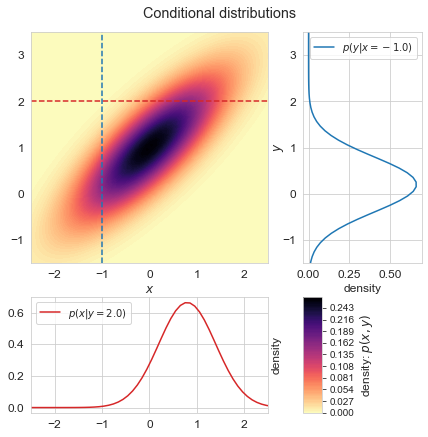

In [16]:
# Plot the conditional distributions
fig = plt.figure(figsize=(7, 7))
gs = gridspec.GridSpec(
    2, 2, width_ratios=[2, 1], height_ratios=[2, 1])
# gs.update(wspace=0., hspace=0.)
plt.suptitle('Conditional distributions', y=0.93)

# Plot surface on top left
ax1 = plt.subplot(gs[0])
x, y, p = generate_surface(mean, cov, d)
# Plot bivariate distribution
con = ax1.contourf(x, y, p, 100, cmap=cm.magma_r)
# y=1 that is conditioned upon
ax1.plot([-2.5, 2.5], [y_condition, y_condition], '--', c=cm.tab10(3))
# x=-1. that is conditioned upon
ax1.plot([x_condition, x_condition], [-1.5, 3.5], '--', c=cm.tab10(0))
ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')
ax1.yaxis.set_label_position('right')
ax1.axis([-2.5, 2.5, -1.5, 3.5])

# Plot y|x
ax2 = plt.subplot(gs[1])
yx = np.linspace(-5, 5, num=100)
pyx = univariate_normal(yx, mean_ygivenx, cov_ygivenx)
# Plot univariate distribution
ax2.plot(pyx, yx, '-', c=cm.tab10(0), label=f'$p(y|x={x_condition:.1f})$')
ax2.legend(loc=0, fontsize=10)
ax2.set_xlabel('density')
ax2.set_ylim(-1.5, 3.5)

# Plot x|y
ax3 = plt.subplot(gs[2])
xy = np.linspace(-5, 5, num=100)
pxy = univariate_normal(xy, mean_xgiveny, cov_xgiveny)
# Plot univariate distribution
ax3.plot(xy, pxy, '-', c=cm.tab10(3), label=f'$p(x|y={y_condition:.1f})$')
ax3.legend(loc=0, fontsize=10)
ax3.set_ylabel('density')
ax3.yaxis.set_label_position('right')
ax3.set_xlim(-2.5, 2.5)

# Clear axis 4 and plot colarbar in its place
ax4 = plt.subplot(gs[3])
ax4.set_visible(False)
divider = make_axes_locatable(ax4)
cax = divider.append_axes('left', size='20%', pad=0.05)
cbar = fig.colorbar(con, cax=cax)
cbar.ax.set_ylabel('density: $p(x, y)$')
cbar.ax.tick_params(labelsize=10)
plt.show()

---

## Задания: ##

 - Напишите функцию, осуществляющую разложение Холецкого.

## Литература

1. Ширяев А.Н. Вероятность &mdash; 1. М.: МЦНМО, 2007
1. Roelants P. JNotebook &laquo;multivariate-normal-primer&raquo;

In [15]:
# Versions used
print('Python: {}.{}.{}'.format(*sys.version_info[:3]))
print('numpy: {}'.format(np.__version__))
print('matplotlib: {}'.format(matplotlib.__version__))
print('seaborn: {}'.format(sns.__version__))

Python: 3.7.4
numpy: 1.16.5
matplotlib: 3.1.1
seaborn: 0.9.0
